In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import glob

In [33]:
import warnings
warnings.filterwarnings("ignore")

### Import Datasets

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census

In [3]:
files = glob.glob("state*.csv")
us_census = []
for filename in files:
    data = pd.read_csv(filename)
    us_census.append(data)
df = pd.concat(us_census)

In [4]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


### Data Cleaning

In [5]:
# Drop Unnamed: 0 Column
df = df.drop(columns = ["Unnamed: 0"])

In [6]:
# Rename Columns
df = df.rename(columns = {"TotalPop": "Population",
                            "GenderPop": "Gender Population"})

In [7]:
# Remove percentage sign from columns
df["Hispanic"] = df["Hispanic"].str.rstrip("%").astype("float").round(2)
df["Black"] = df["Black"].str.rstrip("%").astype("float").round(2)
df["White"] = df["White"].str.rstrip("%").astype("float").round(2)
df["Native"] = df["Native"].str.rstrip("%").astype("float").round(2)
df["Asian"] = df["Asian"].str.rstrip("%").astype("float").round(2)
df["Pacific"] = df["Pacific"].str.rstrip("%").astype("float").round(2)
df["Income"] = df["Income"].str.lstrip("$").astype("float").round(2)

In [8]:
# Split Gender Population column in Males and Females
df["Gender Population"] = df["Gender Population"].str.split("_")
df.head()

,State,Population,Hispanic,White,Black,Native,Asian,Pacific,Income,Gender Population
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,"[2341093M, 2489527F]"
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,"[384160M, 349215F]"
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,"[3299088M, 3342840F]"
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,"[1451913M, 1506295F]"
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,"[19087135M, 19334329F]"


In [9]:
# Males Males and Females Column
df["Males"] = df["Gender Population"].str.get(0)
df["Females"] = df["Gender Population"].str.get(1)
df.head()

,State,Population,Hispanic,White,Black,Native,Asian,Pacific,Income,Gender Population,Males,Females
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,"[2341093M, 2489527F]",2341093M,2489527F
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,"[384160M, 349215F]",384160M,349215F
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,"[3299088M, 3342840F]",3299088M,3342840F
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,"[1451913M, 1506295F]",1451913M,1506295F
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,"[19087135M, 19334329F]",19087135M,19334329F


In [10]:
# Remove M and F characyer from column values
df["Males"] = df["Males"].replace("[M]", "", regex = True)
df["Females"] = df["Females"].replace("[F]", "", regex = True)
df.head()

,State,Population,Hispanic,White,Black,Native,Asian,Pacific,Income,Gender Population,Males,Females
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,"[2341093M, 2489527F]",2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,"[384160M, 349215F]",384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,"[3299088M, 3342840F]",3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,"[1451913M, 1506295F]",1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,"[19087135M, 19334329F]",19087135,19334329


In [11]:
# Convert string to int
df["Males"] = pd.to_numeric(df["Males"])
df["Females"] = pd.to_numeric(df["Females"])

In [12]:
# Fill Nan values of Females by Population - Males
df = df.fillna(value = {"Females": df["Population"] - df["Males"]})

In [13]:
# Drop Duplicated States
df = df.drop_duplicates(["State"])

In [14]:
# Drop Gender Population column
df = df.drop(columns = ["Gender Population"])

In [15]:
# Rename Columns
df = df.rename(columns = {"Hispanic": "Hispanic %",
                          "White": "White %",
                          "Black": "Black %",
                          "Native": "Native %",
                          "Asian": "Asian %",
                          "Pacific": "Pacific %",
                          "Males": "Males %",
                          "Females": "Females %"})

In [16]:
# Make Males % and Females % columns 
df["Males %"] = ((df["Males %"] / df["Population"]) * 100).round(2)
df["Females %"] = ((df["Females %"] / df["Population"]) * 100).round(2)

In [17]:
df.head()

,State,Population,Hispanic %,White %,Black %,Native %,Asian %,Pacific %,Income,Males %,Females %
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,48.46,51.54
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,52.38,47.62
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,49.67,50.33
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,49.08,50.92
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,49.68,50.32


### Data Insights

**10 High states by population**

In [18]:
hsp = df[["State", "Population", "Males %", "Females %", "Income"]].sort_values(by = "Population", ascending = False).head(10)
hsp["Males"] = ((hsp["Population"] / 100) * hsp["Males %"]).round()
hsp["Females"] = ((hsp["Population"] / 100) * hsp["Females %"]).round()
hsp[["State", "Population", "Males %", "Females %", "Males", "Females", "Income"]]

,State,Population,Males %,Females %,Males,Females,Income
4,California,38421464,49.68,50.32,19087783.0,19333681.0,67264.78
4,Texas,26538614,49.63,50.37,13171114.0,13367500.0,55874.52
2,New York,19673174,48.50,51.50,9541489.0,10131685.0,64290.75
4,Florida,19645772,48.87,51.13,9600889.0,10044883.0,50690.19
3,Illinois,12873761,49.07,50.93,6317155.0,6556606.0,59587.05
3,Pennsylvania,12779559,48.87,51.13,6245370.0,6534189.0,56170.46
5,Ohio,11575977,48.92,51.08,5662968.0,5913009.0,49655.25
5,Georgia,10006693,48.80,51.20,4883266.0,5123427.0,50811.08
2,Michigan,9900571,49.11,50.89,4862170.0,5038401.0,51201.83
3,North Carolina,9845333,48.71,51.29,4795662.0,5049671.0,49937.46


**Top 10 High States by Hispanic People** 

In [19]:
hsh = df[["State", "Population", "Males %", "Females %", "Hispanic %"]].sort_values(by = "Hispanic %", ascending = False).head(10)
hsh["Hispanic People"] = ((hsh["Population"] / 100) * hsh["Hispanic %"]).round()
hsh["Hispanic Males"] = ((hsh["Hispanic People"] / 100) * hsh["Males %"]).round()
hsh["Hispanic Females"] = ((hsh["Hispanic People"] / 100) * hsh["Females %"]).round()
hsh

,State,Population,Males %,Females %,Hispanic %,Hispanic People,Hispanic Males,Hispanic Females
4,Puerto Rico,3583073,47.83,52.17,98.89,3543301.0,1694761.0,1848540.0
1,New Mexico,2084117,49.54,50.46,45.28,943688.0,467503.0,476185.0
4,Texas,26538614,49.63,50.37,38.05,10097943.0,5011609.0,5086334.0
4,California,38421464,49.68,50.32,37.29,14327364.0,7117834.0,7209530.0
2,Arizona,6641928,49.67,50.33,29.57,1964018.0,975528.0,988490.0
3,Nevada,2798636,50.30,49.70,27.10,758430.0,381490.0,376940.0
4,Florida,19645772,48.87,51.13,21.34,4192408.0,2048830.0,2143578.0
5,Colorado,5278906,50.17,49.83,20.78,1096957.0,550343.0,546614.0
5,New Jersey,8904413,48.77,51.23,18.75,1669577.0,814253.0,855324.0
2,New York,19673174,48.50,51.50,17.24,3391655.0,1644953.0,1746702.0


**Top 10 High States by White People**

In [20]:
hsw = df[["State", "Population", "Males %", "Females %", "White %"]].sort_values(by = "White %", ascending = False).head(10)
hsw["White People"] = ((hsw["Population"] / 100) * hsw["White %"]).round()
hsw["White Males"] = ((hsw["White People"] / 100) * hsw["Males %"]).round()
hsw["White Females"] = ((hsw["White People"] / 100) * hsw["Females %"]).round()
hsw

,State,Population,Males %,Females %,White %,White People,White Males,White Females
1,Vermont,626604,49.25,50.75,93.98,588882.0,290024.0,298858.0
4,Maine,1329100,48.91,51.09,93.71,1245500.0,609174.0,636326.0
4,West Virginia,1851420,49.35,50.65,92.18,1706639.0,842226.0,864413.0
4,New Hampshire,1324201,49.35,50.65,91.32,1209260.0,596770.0,612490.0
5,Iowa,3093526,49.61,50.39,87.72,2713641.0,1346237.0,1367404.0
4,North Dakota,721640,50.99,49.01,87.45,631074.0,321785.0,309289.0
1,Montana,1014699,50.28,49.72,86.42,876903.0,440907.0,435996.0
2,Kentucky,4397353,49.22,50.78,85.23,3747864.0,1844699.0,1903165.0
2,Idaho,1616547,50.14,49.86,83.14,1343997.0,673880.0,670117.0
2,South Dakota,843190,50.22,49.78,82.50,695632.0,349346.0,346286.0


**Top 10 high States by Black People**

In [21]:
hsb = df[["State", "Population", "Males %", "Females %", "Black %"]].sort_values(by = "Black %", ascending = False).head(10)
hsb["Black People"] = ((hsb["Population"] / 100) * hsb["Black %"]).round(2)
hsb["Black Males"] = ((hsb["Black People"] / 100) * hsb["Males %"]).round(2)
hsb["Black Females"] = ((hsb["Black People"] / 100) * hsb["Females %"]).round(2)
hsb[["State", ]]

,State
3,District of Columbia
4,Mississippi
3,Louisiana
5,Georgia
0,Alabama
5,Maryland
1,South Carolina
3,North Carolina
2,Delaware
2,Virginia


**Top 10 high States by Native People**

In [22]:
hsn = df[["State", "Population", "Males %", "Females %", "Native %"]].sort_values(by = "Native %", ascending = False).head(10)
hsn["Native People"] = ((hsn["Population"] / 100) * hsn["Native %"]).round()
hsn["Native Males"] = ((hsn["Native People"] / 100) * hsn["Males %"]).round()
hsn["Native Females"] = ((hsn["Native People"] / 100) * hsn["Females %"]).round()
hsn

,State,Population,Males %,Females %,Native %,Native People,Native Males,Native Females
1,Alaska,733375,52.38,47.62,16.39,120200.0,62961.0,57239.0
2,South Dakota,843190,50.22,49.78,9.42,79428.0,39889.0,39539.0
1,New Mexico,2084117,49.54,50.46,9.25,192781.0,95504.0,97277.0
1,Montana,1014699,50.28,49.72,7.06,71638.0,36020.0,35618.0
1,Oklahoma,3849733,49.53,50.47,6.72,258702.0,128135.0,130567.0
4,North Dakota,721640,50.99,49.01,5.65,40773.0,20790.0,19983.0
2,Arizona,6641928,49.67,50.33,4.36,289588.0,143838.0,145750.0
2,Idaho,1616547,50.14,49.86,1.47,23763.0,11915.0,11848.0
3,Washington,6985464,49.93,50.07,1.41,98495.0,49179.0,49316.0
3,North Carolina,9845333,48.71,51.29,1.09,107314.0,52273.0,55041.0


**Top 10 high States by Asian People**

In [23]:
hsa = df[["State", "Population", "Males %", "Females %", "Asian %"]].sort_values(by = "Asian %", ascending = False).head(10)
hsa["Asian People"] = ((hsa["Population"] / 100) * hsa["Asian %"]).round()
hsa["Asian Males"] = ((hsa["Asian People"] / 100) * hsa["Males %"]).round()
hsa["Asian Females"] = ((hsa["Asian People"] / 100) * hsa["Females %"]).round()
hsa

,State,Population,Males %,Females %,Asian %,Asian People,Asian Males,Asian Females
1,Hawaii,1406299,50.48,49.52,36.59,514565.0,259752.0,254813.0
4,California,38421464,49.68,50.32,13.05,5014001.0,2490956.0,2523045.0
5,New Jersey,8904413,48.77,51.23,8.16,726600.0,354363.0,372237.0
2,New York,19673174,48.50,51.50,7.90,1554181.0,753778.0,800403.0
3,Nevada,2798636,50.30,49.70,7.10,198703.0,99948.0,98755.0
3,Washington,6985464,49.93,50.07,7.02,490380.0,244847.0,245533.0
1,Massachusetts,6705586,48.46,51.54,5.84,391606.0,189772.0,201834.0
2,Virginia,8256630,49.18,50.82,5.46,450812.0,221709.0,229103.0
1,Alaska,733375,52.38,47.62,5.45,39969.0,20936.0,19033.0
5,Maryland,5930538,48.44,51.56,5.33,316098.0,153118.0,162980.0


**Top 10 high States by Pacific People**

In [24]:
hsp = df[["State", "Population", "Males %", "Females %", "Pacific %"]].sort_values(by = "Pacific %", ascending = False).head(10)
hsp["Pacific People"] = ((hsp["Population"] / 100) * hsp["Pacific %"]).round()
hsp["Pacific Males"] = ((hsp["Pacific People"] / 100) * hsp["Males %"]).round()
hsp["Pacific Females"] = ((hsp["Pacific People"] / 100) * hsp["Females %"]).round()
hsp

,State,Population,Males %,Females %,Pacific %,Pacific People,Pacific Males,Pacific Females
1,Hawaii,1406299,50.48,49.52,8.76,123192.0,62187.0,61005.0
1,Alaska,733375,52.38,47.62,1.06,7774.0,4072.0,3702.0
5,Utah,2903379,50.26,49.74,0.83,24098.0,12112.0,11986.0
3,Washington,6985464,49.93,50.07,0.61,42611.0,21276.0,21335.0
3,Nevada,2798636,50.30,49.70,0.57,15952.0,8024.0,7928.0
4,California,38421464,49.68,50.32,0.35,134475.0,66807.0,67668.0
2,Oregon,3939233,49.46,50.54,0.35,13787.0,6819.0,6968.0
2,Arizona,6641928,49.67,50.33,0.17,11291.0,5608.0,5683.0
3,Arkansas,2958208,49.08,50.92,0.15,4437.0,2178.0,2259.0
2,Idaho,1616547,50.14,49.86,0.13,2102.0,1054.0,1048.0


**Top 10 high States by Income**

In [28]:
hsi = df[["State", "Population", "Males %", "Females %", "Income"]].sort_values(by = "Income", ascending = False).head(10)
hsi["Males"] = ((hsi["Population"] / 100) * hsi["Males %"]).round()
hsi["Females"] = ((hsi["Population"] / 100) * hsi["Females %"]).round()
hsi[["State", "Population", "Males %", "Females %", "Males","Females", "Income"]]

,State,Population,Males %,Females %,Males,Females,Income
5,Maryland,5930538,48.44,51.56,2872753.0,3057785.0,78765.40
5,New Jersey,8904413,48.77,51.23,4342682.0,4561731.0,76581.08
1,Connecticut,3593222,48.75,51.25,1751696.0,1841526.0,76146.56
3,District of Columbia,647484,47.36,52.64,306648.0,340836.0,75466.36
1,Hawaii,1406299,50.48,49.52,709900.0,696399.0,73264.43
2,Virginia,8256630,49.18,50.82,4060611.0,4196019.0,72866.01
1,Massachusetts,6705586,48.46,51.54,3249527.0,3456059.0,72838.94
1,Alaska,733375,52.38,47.62,384142.0,349233.0,70354.74
4,New Hampshire,1324201,49.35,50.65,653493.0,670708.0,68728.86
4,California,38421464,49.68,50.32,19087783.0,19333681.0,67264.78


**Top 10 high states by Males**

In [38]:
hsm = df[["State", "Population", "Males %", "Females %", "Income"]].sort_values(by = "Males %", ascending = False).head(10)
hsm["Males"] = ((hsm["Population"] / 100) * hsm["Males %"]).round()
hsm["Females"] = ((hsm["Population"] / 100) * hsm["Females %"]).round()
hsm[["State", "Population", "Males %", "Females %", "Males", "Females", "Income"]]

,State,Population,Males %,Females %,Males,Females,Income
1,Alaska,733375,52.38,47.62,384142.0,349233.0,70354.74
4,North Dakota,721640,50.99,49.01,367964.0,353676.0,58188.11
1,Hawaii,1406299,50.48,49.52,709900.0,696399.0,73264.43
3,Nevada,2798636,50.30,49.70,1407714.0,1390922.0,55526.53
1,Montana,1014699,50.28,49.72,510191.0,504508.0,47645.68
5,Utah,2903379,50.26,49.74,1459238.0,1444141.0,63488.92
2,South Dakota,843190,50.22,49.78,423450.0,419740.0,51805.41
5,Colorado,5278906,50.17,49.83,2648427.0,2630479.0,64657.80
2,Idaho,1616547,50.14,49.86,810537.0,806010.0,48017.32
3,Washington,6985464,49.93,50.07,3487842.0,3497622.0,64493.77


**Top 10 high states by Females**

In [40]:
hsf = df[["State", "Population", "Males %", "Females %", "Income"]].sort_values(by = "Females %", ascending = False).head(10)
hsf

,State,Population,Males %,Females %,Income
3,District of Columbia,647484,47.36,52.64,75466.36
4,Puerto Rico,3583073,47.83,52.17,20720.54
2,Delaware,926454,48.40,51.60,61827.98
5,Rhode Island,1053661,48.44,51.56,59125.27
5,Maryland,5930538,48.44,51.56,78765.40
0,Alabama,4830620,48.46,51.54,43296.36
1,Massachusetts,6705586,48.46,51.54,72838.94
2,New York,19673174,48.50,51.50,64290.75
4,Mississippi,2988081,48.58,51.42,38909.92
1,South Carolina,4777576,48.61,51.39,46296.81


**Top 10 states having females greater than males**

In [169]:
fgm = df[df["Females %"] > df["Males %"]]
print("Number of states having females greater than males =", len(fgm))

Number of states having females greater than males = 42


In [170]:
fgm = fgm.head(9)
fgm = fgm[["State", "Population", "Males %", "Females %", "Income"]].sort_values(by = "Females %", ascending = False).reset_index()
fgm = fgm.drop(columns = ["index"])
fgm

,State,Population,Males %,Females %,Income
0,District of Columbia,647484,47.36,52.64,75466.36
1,Delaware,926454,48.40,51.60,61827.98
2,Alabama,4830620,48.46,51.54,43296.36
3,Connecticut,3593222,48.75,51.25,76146.56
4,Georgia,10006693,48.80,51.20,50811.08
5,Florida,19645772,48.87,51.13,50690.19
6,Arkansas,2958208,49.08,50.92,41935.63
7,Arizona,6641928,49.67,50.33,54207.82
8,California,38421464,49.68,50.32,67264.78


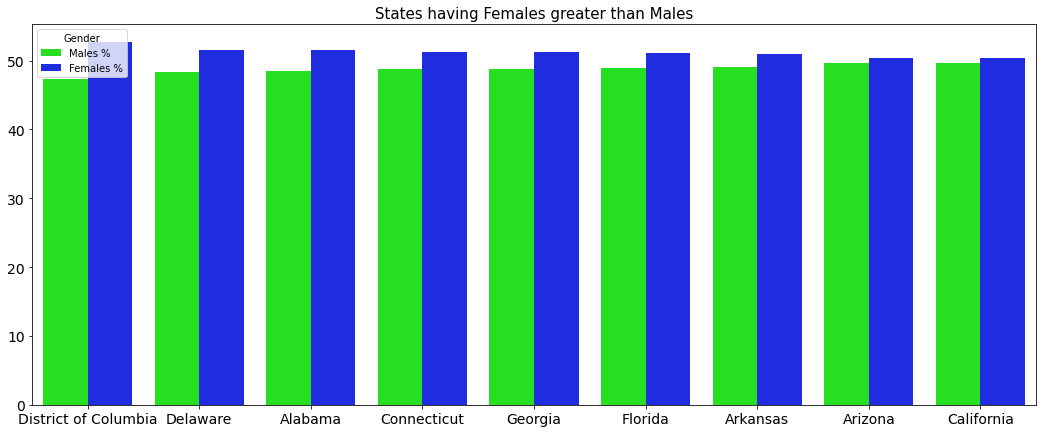

In [171]:
fgm = fgm[["State", "Males %", "Females %"]]
fgm = fgm.melt("State", var_name = "Gender", value_name = "Percentage")
plt.figure(figsize = (18, 7))
sns.barplot(x = fgm["State"], y = fgm["Percentage"], hue = fgm["Gender"], palette = "hsv")
plt.title("States having Females greater than Males", size = 15)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Top 10 states having males greater than females**

In [172]:
mgf = df[df["Males %"] > df["Females %"]]
print("Number of states having males greater than females =", len(mgf))

Number of states having males greater than females = 9


In [173]:
mgf = mgf[["State", "Population", "Males %", "Females %", "Income"]].sort_values(by = "Males %", ascending = False).head(9).reset_index()
mgf = mgf.drop(columns = ["index"])
mgf

,State,Population,Males %,Females %,Income
0,Alaska,733375,52.38,47.62,70354.74
1,North Dakota,721640,50.99,49.01,58188.11
2,Hawaii,1406299,50.48,49.52,73264.43
3,Nevada,2798636,50.30,49.70,55526.53
4,Montana,1014699,50.28,49.72,47645.68
5,Utah,2903379,50.26,49.74,63488.92
6,South Dakota,843190,50.22,49.78,51805.41
7,Colorado,5278906,50.17,49.83,64657.80
8,Idaho,1616547,50.14,49.86,48017.32


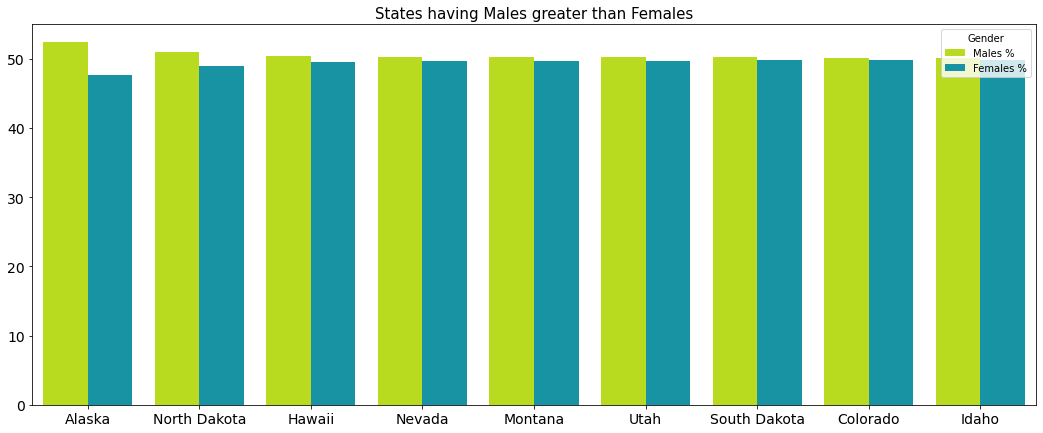

In [174]:
mgf = mgf[["State", "Males %", "Females %"]]
mgf = mgf.melt("State", var_name = "Gender", value_name = "Percentage")
plt.figure(figsize = (18, 7))
sns.barplot(x = mgf["State"], y = mgf["Percentage"], hue = mgf["Gender"], palette = "nipy_spectral_r")
plt.title("States having Males greater than Females", size = 15)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Incomes where genders are greater than each other**

In [118]:
mf = pd.concat([mgf, fgm], axis = 1)
mf

,State,Population,Males %,Females %,Income,State,Population,Males %,Females %,Income
0,Alaska,733375,52.38,47.62,70354.74,District of Columbia,647484,47.36,52.64,75466.36
1,North Dakota,721640,50.99,49.01,58188.11,Delaware,926454,48.40,51.60,61827.98
2,Hawaii,1406299,50.48,49.52,73264.43,Alabama,4830620,48.46,51.54,43296.36
3,Nevada,2798636,50.30,49.70,55526.53,Connecticut,3593222,48.75,51.25,76146.56
4,Montana,1014699,50.28,49.72,47645.68,Georgia,10006693,48.80,51.20,50811.08
5,Utah,2903379,50.26,49.74,63488.92,Florida,19645772,48.87,51.13,50690.19
6,South Dakota,843190,50.22,49.78,51805.41,Arkansas,2958208,49.08,50.92,41935.63
7,Colorado,5278906,50.17,49.83,64657.80,Arizona,6641928,49.67,50.33,54207.82
8,Idaho,1616547,50.14,49.86,48017.32,California,38421464,49.68,50.32,67264.78
